In [25]:
# %loadpy tutorial-part1.py

In [26]:
# import sys
# sys.path.append('/Users/alex/Documents/OpenPIV/openpiv-python')


import openpiv.tools
import openpiv.process
import openpiv.scaling

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
frame_a  = openpiv.tools.imread( 'Run28Oct000000.T000.D000.P000.H002.LA.JPG' )
frame_b  = openpiv.tools.imread( 'Run28Oct000000.T000.D000.P000.H002.LB.JPG' )

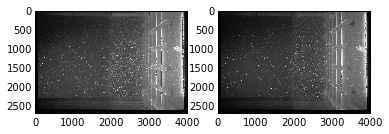

In [28]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


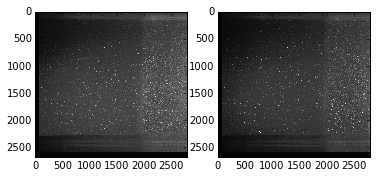

In [29]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a[:,:2800],cmap=plt.cm.gray)
ax[1].imshow(frame_b[:,:2800],cmap=plt.cm.gray)

In [30]:
frame_a = frame_a[:,:2800]
frame_b = frame_b[:,:2800]

In [49]:
winsize = 64 # pixels
searchsize = 128  # pixels, search in image B
overlap = 32 # pixels
dt = 1 # sec


u0, v0, sig2noise = openpiv.process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

In [50]:
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

In [51]:
u1, v1, mask = openpiv.validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.0 )
print np.nansum((u1 - u0)**2)

0.0


In [52]:
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)
print np.nansum((u2 - u1)**2)

0.0


In [53]:
x, y, u3, v3 = openpiv.scaling.uniform(x, y, u2, v2, scaling_factor = 96.52 )
print np.nansum((u3 - u2)**2)

203692.508216


In [54]:
openpiv.tools.save(x, y, u3, v3, mask, 'two_layers.txt' )

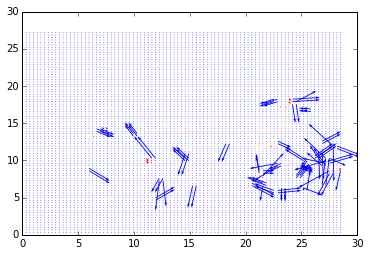

In [56]:
openpiv.tools.display_vector_field('two_layers.txt', scale=10, width=0.0025)